In [3]:
import numpy as np 
import pandas as pd 
import string 
import spacy
import warnings
warnings.filterwarnings("ignore")
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize,TweetTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [4]:
headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    # Requests sorts cookies= alphabetically
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://www.amazon.in/OnePlus-Nord-Black-128GB-Storage/dp/B09WQY65HN/ref=sr_1_4?crid=1D99WHM86WX80&keywords=oneplus\
    &qid=1656009113&sprefix=onep%2Caps%2C315&sr=8-4&th=1',
    'rtt': '0',
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '2',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'viewport-width': '2400',
}

In [5]:
from bs4 import BeautifulSoup
import requests

# Function to get page content

def get_soup(url):
    r=requests.get(url,headers=headers,params={'url':url,'wait':2})
    soup=BeautifulSoup(r.text,'html.parser')
    return soup   

In [6]:
# Function to get review list

review_list=[]
def get_reviews(soup):
    reviews=soup.findAll('div',{'data-hook':'review'})
    try:
        for item in reviews:
            review = {
                'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
                'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
                }
            review_list.append(review)
    except:
        pass

In [7]:
from tqdm import tqdm_notebook

# Function for stopping condition

for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/OnePlus-Nord-Chromatic-128GB-Storage/product-reviews/B0BY8MCQ9S/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews')
    get_reviews(soup)
    if not soup.find('li',{'class':'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/999 [00:00<?, ?it/s]

In [8]:
review_list

[{'Rating': 4.0,
  'Title': '4.0 out of 5 stars\nFantastic Phone with Impressive Features!',
  'Review': "I recently upgraded to the OnePlus Nord CE 3 Lite 5G in Pastel Lime, and I've been thoroughly impressed with its performance and features. Here's what I love about it:**Pros:**1. **Affordable 5G:** The inclusion of 5G capabilities in a phone at this price point is a huge plus. Streaming and downloading content is lightning-fast, and I'm future-proofed for upcoming advancements in connectivity.2. **Sleek Design:** The Pastel Lime color is unique and adds a refreshing touch to the device. The slim profile and lightweight build make it comfortable to hold and use for extended periods.3. **Smooth Performance:** With 8GB of RAM, multitasking is a breeze. The phone handles various apps and tasks simultaneously without any lag or slowdowns.4. **Ample Storage:** The 128GB storage provides enough room for all my apps, photos, and videos. Plus, the option to expand storage via microSD card i

In [9]:
data1 = pd.DataFrame(review_list)
data1.head()

,Rating,Title,Review,Review_Date
0,4.0,4.0 out of 5 stars\nFantastic Phone with Impre...,I recently upgraded to the OnePlus Nord CE 3 L...,17 August 2023
1,4.0,4.0 out of 5 stars\nAfter a two month review,"Hi all,This is a two month usage review of Nor...",8 December 2023
2,4.0,4.0 out of 5 stars\nOnePlus Nord CE 3 5G - A P...,The OnePlus Nord CE 3 5G is a device that does...,29 October 2023
3,4.0,4.0 out of 5 stars\nAll rounder except camera,"The phone is good overall, the quality, the so...",14 December 2023
4,4.0,4.0 out of 5 stars\nGood performance.. fast ac...,"I liked this smartphone, using since purchased...",12 December 2023


In [10]:
data1.shape

(810, 4)

In [11]:
data1.to_csv('amazon_review_18-12.csv')

In [12]:
temp=0
for i in data1['Title']:
    data1['Title'][temp]=i.split('\n')[1]
    temp+=1

In [13]:
data1['Title']

0              Fantastic Phone with Impressive Features!
1                               After a two month review
2      OnePlus Nord CE 3 5G - A Perfect Blend of Styl...
3                              All rounder except camera
4      Good performance.. fast access to all applicat...
                             ...                        
805                                          Good camera
806                                    Smart budget Fon.
807                                              Perfect
808             Satiesfying performancecompromised looks
809                                         Good product
Name: Title, Length: 810, dtype: object

In [14]:
temp=0
for i in data1['Review_Date']:
    data1['Review_Date'][temp]=i.replace("Reviewed in India 🇮🇳 on ","")
    temp+=1

In [15]:
data1

,Rating,Title,Review,Review_Date
0,4.0,Fantastic Phone with Impressive Features!,I recently upgraded to the OnePlus Nord CE 3 L...,17 August 2023
1,4.0,After a two month review,"Hi all,This is a two month usage review of Nor...",8 December 2023
2,4.0,OnePlus Nord CE 3 5G - A Perfect Blend of Styl...,The OnePlus Nord CE 3 5G is a device that does...,29 October 2023
3,4.0,All rounder except camera,"The phone is good overall, the quality, the so...",14 December 2023
4,4.0,Good performance.. fast access to all applicat...,"I liked this smartphone, using since purchased...",12 December 2023
...,...,...,...,...
805,4.0,Good camera,This is a good product and photo shoot by came...,15 December 2023
806,4.0,Smart budget Fon.,Awesome Fon at this budget.,14 December 2023
807,4.0,Perfect,Perfect phone for mid budget. Nice for family ...,15 December 2023
808,4.0,Satiesfying performancecompromised looks,Camera fine.Performance up to the markOverall ...,18 October 2023


In [16]:
data1.to_csv('extracted_and_transformed_review_amazon_18-12.csv')

In [17]:
# EDA

data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       810 non-null    float64
 1   Title        810 non-null    object 
 2   Review       810 non-null    object 
 3   Review_Date  810 non-null    object 
dtypes: float64(1), object(3)
memory usage: 25.4+ KB


In [18]:
data1.describe()

,Rating
count,810.0
mean,4.0
std,0.0
min,4.0
25%,4.0
50%,4.0
75%,4.0
max,4.0


In [19]:
data1['Rating'].value_counts()

4.0    810
Name: Rating, dtype: int64

In [20]:
data1['word_count']=data1.Review.apply(lambda x: len(str(x).split(" ")))
data1[['Review','word_count']].head()

,Review,word_count
0,I recently upgraded to the OnePlus Nord CE 3 L...,333
1,"Hi all,This is a two month usage review of Nor...",170
2,The OnePlus Nord CE 3 5G is a device that does...,239
3,"The phone is good overall, the quality, the so...",16
4,"I liked this smartphone, using since purchased...",18


In [21]:
data1['char_count']=data1.Review.str.len()
data1[['Review','word_count','char_count']].head()

,Review,word_count,char_count
0,I recently upgraded to the OnePlus Nord CE 3 L...,333,2138
1,"Hi all,This is a two month usage review of Nor...",170,926
2,The OnePlus Nord CE 3 5G is a device that does...,239,1461
3,"The phone is good overall, the quality, the so...",16,96
4,"I liked this smartphone, using since purchased...",18,121


In [22]:
from textblob import TextBlob
data1.Review[:5].apply(lambda x:str(TextBlob(x).correct()))

0    I recently upgrade to the OnePlus Word of 3 Si...
1    I all,His is a two month usage review of Word ...
2    The OnePlus Word of 3 Of is a device that does...
3    The phone is good overall, the quality, the so...
4    I liked this smartphone, using since purchased...
Name: Review, dtype: object

In [23]:
print(data1.Review_Date.str.split(" "))

0        [17, August, 2023]
1       [8, December, 2023]
2       [29, October, 2023]
3      [14, December, 2023]
4      [12, December, 2023]
               ...         
805    [15, December, 2023]
806    [14, December, 2023]
807    [15, December, 2023]
808     [18, October, 2023]
809     [18, October, 2023]
Name: Review_Date, Length: 810, dtype: object


In [24]:
data1['date']=data1.Review_Date.str.split(" ").str[0]
data1['month']=data1.Review_Date.str.split(" ").str[1]
data1['year']=data1.Review_Date.str.split(" ").str[2]
data1[['date','month','year']].head()

,date,month,year
0,17,August,2023
1,8,December,2023
2,29,October,2023
3,14,December,2023
4,12,December,2023


In [25]:
data1.month.value_counts().unique()

array([486, 243,  81], dtype=int64)

In [26]:
data1.month=data1.month.replace({'April':4, 'May':5 ,'March':3,'June':6,'October':10 ,'November':11,'February':2,'January':1, 'December':12,'July':7,'August':8,'September':9})

In [27]:
data1.head()

,Rating,Title,Review,Review_Date,word_count,char_count,date,month,year
0,4.0,Fantastic Phone with Impressive Features!,I recently upgraded to the OnePlus Nord CE 3 L...,17 August 2023,333,2138,17,8,2023
1,4.0,After a two month review,"Hi all,This is a two month usage review of Nor...",8 December 2023,170,926,8,12,2023
2,4.0,OnePlus Nord CE 3 5G - A Perfect Blend of Styl...,The OnePlus Nord CE 3 5G is a device that does...,29 October 2023,239,1461,29,10,2023
3,4.0,All rounder except camera,"The phone is good overall, the quality, the so...",14 December 2023,16,96,14,12,2023
4,4.0,Good performance.. fast access to all applicat...,"I liked this smartphone, using since purchased...",12 December 2023,18,121,12,12,2023


In [28]:
review=data1.copy()
review.drop(['Review_Date','word_count','char_count'],axis=1,inplace=True)
review.head()

,Rating,Title,Review,date,month,year
0,4.0,Fantastic Phone with Impressive Features!,I recently upgraded to the OnePlus Nord CE 3 L...,17,8,2023
1,4.0,After a two month review,"Hi all,This is a two month usage review of Nor...",8,12,2023
2,4.0,OnePlus Nord CE 3 5G - A Perfect Blend of Styl...,The OnePlus Nord CE 3 5G is a device that does...,29,10,2023
3,4.0,All rounder except camera,"The phone is good overall, the quality, the so...",14,12,2023
4,4.0,Good performance.. fast access to all applicat...,"I liked this smartphone, using since purchased...",12,12,2023


In [29]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rating  810 non-null    float64
 1   Title   810 non-null    object 
 2   Review  810 non-null    object 
 3   date    810 non-null    object 
 4   month   810 non-null    int64  
 5   year    810 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 38.1+ KB


In [30]:
review[['date','year']]=review[['date','year']].astype('int64')

In [31]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rating  810 non-null    float64
 1   Title   810 non-null    object 
 2   Review  810 non-null    object 
 3   date    810 non-null    int64  
 4   month   810 non-null    int64  
 5   year    810 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 38.1+ KB


In [35]:
daywiseReview.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   date    7 non-null      int64
 1   Review  7 non-null      int64
dtypes: int64(2)
memory usage: 244.0 bytes


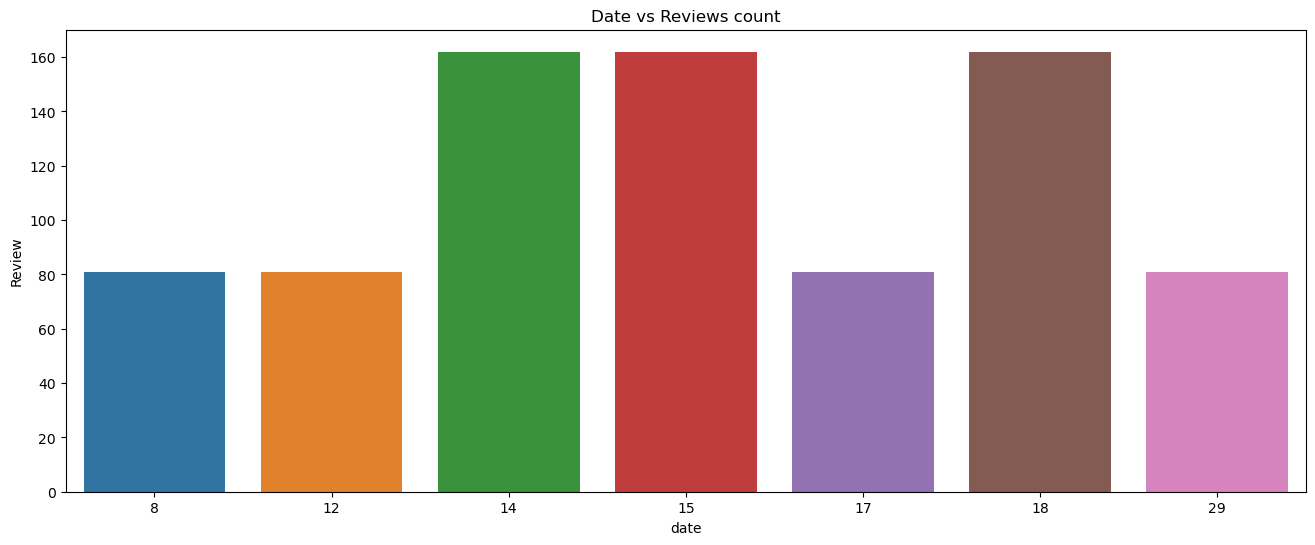

In [34]:
import seaborn as sns

daywiseReview=pd.DataFrame(review.groupby('date')['Review'].count()).reset_index()
plt.figure(figsize=(16,6))
sns.barplot(x='date',y='Review',data=daywiseReview)
plt.title('Date vs Reviews count')
plt.show()

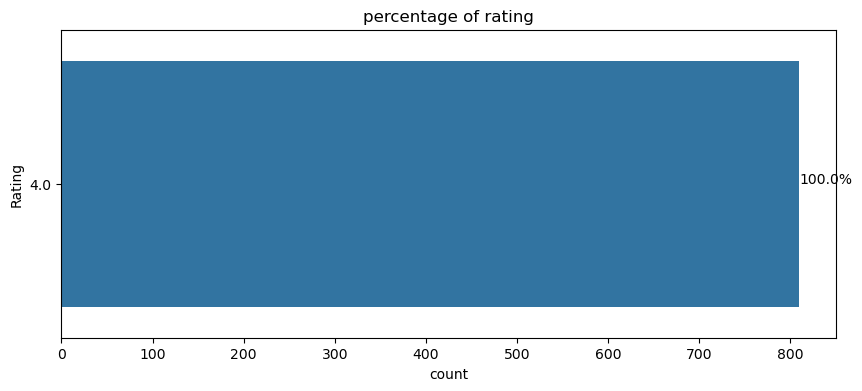

In [36]:
plt.figure(figsize=(10,4))
plt.title('percentage of rating')
ax=sns.countplot(y='Rating',data=review)
total=len(review)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x=p.get_x()+p.get_width()+0.02
    y=p.get_y()+p.get_height()/2
    ax.annotate(percentage,(x,y))

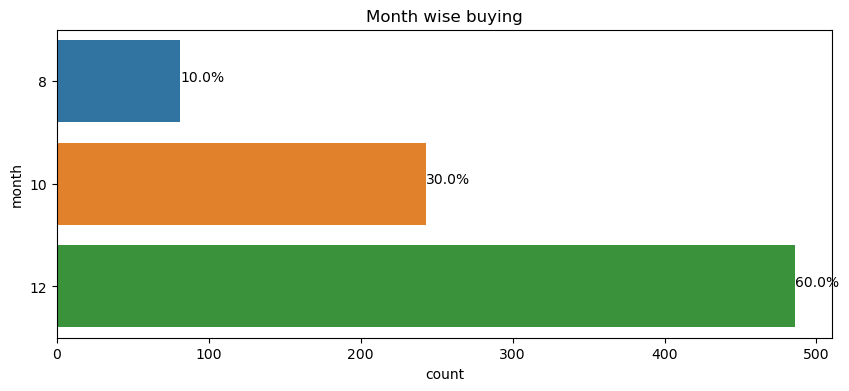

In [37]:
plt.figure(figsize=(10,4))
plt.title('Month wise buying')
ax=sns.countplot(y='month',data=data1)
total=len(review)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x=p.get_x()+p.get_width()+0.02
    y=p.get_y()+p.get_height()/2
    ax.annotate(percentage,(x,y))

In [38]:
# Text Pre-processing

data=pd.DataFrame(review.iloc[:,2])
data.head()

,Review
0,I recently upgraded to the OnePlus Nord CE 3 L...
1,"Hi all,This is a two month usage review of Nor..."
2,The OnePlus Nord CE 3 5G is a device that does...
3,"The phone is good overall, the quality, the so..."
4,"I liked this smartphone, using since purchased..."


In [42]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize,TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_txt=pd.read_fwf("stop.txt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vaibh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vaibh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
my_stop_word=stopwords.words('english')
my_stop_word.extend(stop_txt.a)
print(my_stop_word)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [44]:
data['Review']=data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() if x not in my_stop_word))
data['Review']

0      i recently upgraded oneplus nord ce 3 lite 5g ...
1      hi all,this month usage review nord 3 ce lite ...
2      the oneplus nord ce 3 5g device doesn’t disapp...
3      the phone good overall, quality, software, con...
4      i smartphone, purchased..fast charging, camera...
                             ...                        
805          this good product photo shoot camera good 👍
806                                  awesome fon budget.
807        perfect phone mid budget. nice family ladies.
808    camera fine.performance markoverall good produ...
809    it's good performance design colour budget fri...
Name: Review, Length: 810, dtype: object

In [45]:
data.iloc[0,:]

Review    i recently upgraded oneplus nord ce 3 lite 5g ...
Name: 0, dtype: object

In [46]:
#lematization
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     - -------------------------------------- 0.6/12.8 MB 12.0 MB/s eta 0:00:02
     --- ------------------------------------ 1.1/12.8 MB 11.4 MB/s eta 0:00:02
     ----- ---------------------------------- 1.6/12.8 MB 11.4 MB/s eta 0:00:01
     ------ --------------------------------- 2.1/12.8 MB 11.3 MB/s eta 0:00:01
     -------- ------------------------------- 2.7/12.8 MB 11.3 MB/s eta 0:00:01
     ---------- ----------------------------- 3.2/12.8 MB 11.4 MB/s eta 0:00:01
     ----------- ---------------------------- 3.8/12.8 MB 12.0 MB/s eta 0:00:01
     ------------- -------------------------- 4.3/12.8 MB 12.0 MB/s eta 0:00:01
     --------------- ------------------------ 4.8/12.8 MB 11.9 MB/s eta 0:00:01
     ---------------- ----------------------- 5.4/12.8 MB 11.9 MB/s eta 0:00:01
     ------------------ --------------------- 5.9/12.8 MB 11.7 MB/s eta 0:00:01
     ------------------- -------------------- 6.

In [47]:
#removal of punctuation

import re
import nltk
nltk.download('wordnet')

corpus=[]
lemmat=WordNetLemmatizer()
for i in tqdm_notebook(range(0,len(data))):
    cleaned=re.sub('[^a-zA-Z]', " ", data["Review"][i])
    cleaned=cleaned.lower()
    cleaned=cleaned.split()
    cleaned=[lemmat.lemmatize(word) for word in cleaned if word not in my_stop_word]
    cleaned=' '.join(cleaned)
    corpus.append(cleaned)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vaibh\AppData\Roaming\nltk_data...


  0%|          | 0/810 [00:00<?, ?it/s]

In [48]:
clean_df=pd.DataFrame({'cleaned_review':corpus,'uncleaned_review':data['Review']})
clean_df.head(10)

,cleaned_review,uncleaned_review
0,recently upgraded oneplus nord ce lite pastel ...,i recently upgraded oneplus nord ce 3 lite 5g ...
1,month usage review nord ce lite oneplus regula...,"hi all,this month usage review nord 3 ce lite ..."
2,oneplus nord ce device disappoint seamlessly c...,the oneplus nord ce 3 5g device doesn’t disapp...
3,phone good quality software connectivity camer...,"the phone good overall, quality, software, con..."
4,smartphone purchased fast charging camera upto...,"i smartphone, purchased..fast charging, camera..."
5,good product photo shoot camera good,this good product photo shoot camera good 👍
6,awesome fon budget,awesome fon budget.
7,perfect phone mid budget nice family lady,perfect phone mid budget. nice family ladies.
8,camera fine performance markoverall good produ...,camera fine.performance markoverall good produ...
9,good performance design colour budget friendly...,it's good performance design colour budget fri...


In [49]:
def remove_pattern(text, pattern_regex):
    r=re.findall(pattern_regex,text)
    for i in r:
        text=re.sub(i,'',text)
    return text

In [50]:
clean_df['cleaned_review']=np.vectorize(remove_pattern)(clean_df['cleaned_review'],"@[\w]*")
clean_df.head(10)

,cleaned_review,uncleaned_review
0,recently upgraded oneplus nord ce lite pastel ...,i recently upgraded oneplus nord ce 3 lite 5g ...
1,month usage review nord ce lite oneplus regula...,"hi all,this month usage review nord 3 ce lite ..."
2,oneplus nord ce device disappoint seamlessly c...,the oneplus nord ce 3 5g device doesn’t disapp...
3,phone good quality software connectivity camer...,"the phone good overall, quality, software, con..."
4,smartphone purchased fast charging camera upto...,"i smartphone, purchased..fast charging, camera..."
5,good product photo shoot camera good,this good product photo shoot camera good 👍
6,awesome fon budget,awesome fon budget.
7,perfect phone mid budget nice family lady,perfect phone mid budget. nice family ladies.
8,camera fine performance markoverall good produ...,camera fine.performance markoverall good produ...
9,good performance design colour budget friendly...,it's good performance design colour budget fri...


In [51]:
#removal of https

clean_review=[]
for index,row in clean_df.iterrows():
    words_without_link=[words for words in row.cleaned_review.split() if 'http' not in words]
    clean_review.append(' '.join(words_without_link))
clean_df['cleaned_review']=clean_review

In [52]:
clean_df.head(10)

,cleaned_review,uncleaned_review
0,recently upgraded oneplus nord ce lite pastel ...,i recently upgraded oneplus nord ce 3 lite 5g ...
1,month usage review nord ce lite oneplus regula...,"hi all,this month usage review nord 3 ce lite ..."
2,oneplus nord ce device disappoint seamlessly c...,the oneplus nord ce 3 5g device doesn’t disapp...
3,phone good quality software connectivity camer...,"the phone good overall, quality, software, con..."
4,smartphone purchased fast charging camera upto...,"i smartphone, purchased..fast charging, camera..."
5,good product photo shoot camera good,this good product photo shoot camera good 👍
6,awesome fon budget,awesome fon budget.
7,perfect phone mid budget nice family lady,perfect phone mid budget. nice family ladies.
8,camera fine performance markoverall good produ...,camera fine.performance markoverall good produ...
9,good performance design colour budget friendly...,it's good performance design colour budget fri...


In [53]:
clean_df.shape

(810, 2)

In [54]:
clean_df[clean_df['cleaned_review']=='']

,cleaned_review,uncleaned_review


In [55]:
clean_df=clean_df[clean_df['cleaned_review']!='']
print(clean_df[clean_df['cleaned_review']==''])

Empty DataFrame
Columns: [cleaned_review, uncleaned_review]
Index: []


In [56]:
clean_df.shape

(810, 2)

In [57]:
# Duplicated

clean_df[clean_df.duplicated]

,cleaned_review,uncleaned_review
10,recently upgraded oneplus nord ce lite pastel ...,i recently upgraded oneplus nord ce 3 lite 5g ...
11,month usage review nord ce lite oneplus regula...,"hi all,this month usage review nord 3 ce lite ..."
12,oneplus nord ce device disappoint seamlessly c...,the oneplus nord ce 3 5g device doesn’t disapp...
13,phone good quality software connectivity camer...,"the phone good overall, quality, software, con..."
14,smartphone purchased fast charging camera upto...,"i smartphone, purchased..fast charging, camera..."
...,...,...
805,good product photo shoot camera good,this good product photo shoot camera good 👍
806,awesome fon budget,awesome fon budget.
807,perfect phone mid budget nice family lady,perfect phone mid budget. nice family ladies.
808,camera fine performance markoverall good produ...,camera fine.performance markoverall good produ...


In [58]:
clean_df=clean_df.drop_duplicates()
clean_df=clean_df.reset_index(drop=True)
clean_df.head()

,cleaned_review,uncleaned_review
0,recently upgraded oneplus nord ce lite pastel ...,i recently upgraded oneplus nord ce 3 lite 5g ...
1,month usage review nord ce lite oneplus regula...,"hi all,this month usage review nord 3 ce lite ..."
2,oneplus nord ce device disappoint seamlessly c...,the oneplus nord ce 3 5g device doesn’t disapp...
3,phone good quality software connectivity camer...,"the phone good overall, quality, software, con..."
4,smartphone purchased fast charging camera upto...,"i smartphone, purchased..fast charging, camera..."


In [59]:
clean_df.shape

(10, 2)

In [60]:
#tokenization

clean_df['tokenized']=clean_df.cleaned_review.apply(lambda x: nltk.word_tokenize(x))
clean_df.head(10)

,cleaned_review,uncleaned_review,tokenized
0,recently upgraded oneplus nord ce lite pastel ...,i recently upgraded oneplus nord ce 3 lite 5g ...,"[recently, upgraded, oneplus, nord, ce, lite, ..."
1,month usage review nord ce lite oneplus regula...,"hi all,this month usage review nord 3 ce lite ...","[month, usage, review, nord, ce, lite, oneplus..."
2,oneplus nord ce device disappoint seamlessly c...,the oneplus nord ce 3 5g device doesn’t disapp...,"[oneplus, nord, ce, device, disappoint, seamle..."
3,phone good quality software connectivity camer...,"the phone good overall, quality, software, con...","[phone, good, quality, software, connectivity,..."
4,smartphone purchased fast charging camera upto...,"i smartphone, purchased..fast charging, camera...","[smartphone, purchased, fast, charging, camera..."
5,good product photo shoot camera good,this good product photo shoot camera good 👍,"[good, product, photo, shoot, camera, good]"
6,awesome fon budget,awesome fon budget.,"[awesome, fon, budget]"
7,perfect phone mid budget nice family lady,perfect phone mid budget. nice family ladies.,"[perfect, phone, mid, budget, nice, family, lady]"
8,camera fine performance markoverall good produ...,camera fine.performance markoverall good produ...,"[camera, fine, performance, markoverall, good,..."
9,good performance design colour budget friendly...,it's good performance design colour budget fri...,"[good, performance, design, colour, budget, fr..."


In [61]:
#stemming
from nltk.stem.snowball import SnowballStemmer
stemme=SnowballStemmer('english')

stem_df=pd.DataFrame()
stem_df['stem']=clean_df.cleaned_review.apply(lambda x : " ".join([stemme.stem(word) for word in x.split()]))
stem_df['cleaned_review']=clean_df.cleaned_review
stem_df

,stem,cleaned_review
0,recent upgrad oneplus nord ce lite pastel lime...,recently upgraded oneplus nord ce lite pastel ...
1,month usag review nord ce lite oneplus regular...,month usage review nord ce lite oneplus regula...
2,oneplus nord ce devic disappoint seamless comb...,oneplus nord ce device disappoint seamlessly c...
3,phone good qualiti softwar connect camera bad,phone good quality software connectivity camer...
4,smartphon purchas fast charg camera upto mark ...,smartphone purchased fast charging camera upto...
5,good product photo shoot camera good,good product photo shoot camera good
6,awesom fon budget,awesome fon budget
7,perfect phone mid budget nice famili ladi,perfect phone mid budget nice family lady
8,camera fine perform markoveral good productnot...,camera fine performance markoverall good produ...
9,good perform design colour budget friend opini...,good performance design colour budget friendly...


In [62]:
#lemmatization

word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')

lemm_df=pd.DataFrame()
lemm_df['lema']=clean_df.cleaned_review.apply(lambda x : " ".join([word_lemmatizer.lemmatize(word) for word in x.split()]))
lemm_df['cleaned_review']=clean_df.cleaned_review
lemm_df

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\vaibh\AppData\Roaming\nltk_data...


,lema,cleaned_review
0,recently upgraded oneplus nord ce lite pastel ...,recently upgraded oneplus nord ce lite pastel ...
1,month usage review nord ce lite oneplus regula...,month usage review nord ce lite oneplus regula...
2,oneplus nord ce device disappoint seamlessly c...,oneplus nord ce device disappoint seamlessly c...
3,phone good quality software connectivity camer...,phone good quality software connectivity camer...
4,smartphone purchased fast charging camera upto...,smartphone purchased fast charging camera upto...
5,good product photo shoot camera good,good product photo shoot camera good
6,awesome fon budget,awesome fon budget
7,perfect phone mid budget nice family lady,perfect phone mid budget nice family lady
8,camera fine performance markoverall good produ...,camera fine performance markoverall good produ...
9,good performance design colour budget friendly...,good performance design colour budget friendly...


In [63]:
cv=CountVectorizer()
reviewcv=cv.fit_transform(lemm_df['lema'])

In [64]:
print(cv.get_feature_names_out()[109:200])

['hour' 'huge' 'ideal' 'impressed' 'impressive' 'improved' 'improvement'
 'inclusion' 'interface' 'intuitive' 'job' 'juice' 'lady' 'lag' 'last'
 'latest' 'life' 'light' 'lightning' 'lightweight' 'lime' 'lit' 'lite'
 'love' 'low' 'make' 'making' 'mark' 'markoverall' 'match' 'material'
 'medium' 'microsd' 'mid' 'mitigate' 'model' 'moderate' 'module' 'money'
 'month' 'multitasking' 'navigating' 'needed' 'nice' 'night' 'nord'
 'offer' 'oneplus' 'opinion' 'option' 'outdoor' 'oxygenos' 'package'
 'packet' 'pastel' 'perfect' 'performance' 'period' 'phone' 'photo'
 'pixel' 'placement' 'plastic' 'point' 'poor' 'power' 'premium' 'price'
 'print' 'pro' 'product' 'productnot' 'profile' 'proofed' 'proud'
 'providing' 'purchased' 'quality' 'quick' 'ram' 'recently' 'refreshing'
 'regular' 'reliable' 'remarkable' 'resolution' 'responsive' 'result'
 'review' 'room' 'rounder']


In [65]:
print(cv.get_feature_names_out()[:100])

['accurate' 'add' 'added' 'addition' 'advancement' 'afford' 'affordable'
 'amoled' 'amount' 'ample' 'android' 'appearance' 'apps' 'area' 'average'
 'awesome' 'back' 'backed' 'bad' 'bank' 'battery' 'bit' 'black' 'board'
 'boast' 'breaking' 'breeze' 'browsing' 'budget' 'build' 'camera'
 'capability' 'card' 'carry' 'case' 'category' 'ce' 'charge' 'charger'
 'charging' 'chipset' 'choice' 'clean' 'color' 'colour' 'combine'
 'comfortable' 'coming' 'commendable' 'compelling' 'con' 'conclusion'
 'condition' 'connectivity' 'consumption' 'content' 'continues'
 'convenient' 'crisp' 'customizable' 'day' 'decent' 'deep' 'delivers'
 'density' 'design' 'device' 'disappoint' 'display' 'downloading' 'drain'
 'ease' 'easily' 'easy' 'elegant' 'enhancing' 'ensures' 'excellent'
 'exceptional' 'exceptionally' 'expand' 'experience' 'extended' 'extra'
 'family' 'fantastic' 'fast' 'feature' 'feel' 'fine' 'finger'
 'fingerprint' 'flagship' 'fon' 'friendly' 'front' 'full' 'functionality'
 'future' 'gb']


In [66]:
print(cv.vocabulary_)

{'recently': 189, 'upgraded': 243, 'oneplus': 156, 'nord': 154, 'ce': 36, 'lite': 131, 'pastel': 163, 'lime': 129, 'impressed': 112, 'performance': 165, 'feature': 87, 'love': 132, 'pro': 178, 'affordable': 6, 'inclusion': 116, 'capability': 31, 'phone': 167, 'price': 176, 'point': 172, 'huge': 110, 'streaming': 224, 'downloading': 69, 'content': 55, 'lightning': 127, 'fast': 86, 'future': 98, 'proofed': 182, 'upcoming': 241, 'advancement': 4, 'connectivity': 53, 'sleek': 213, 'design': 65, 'color': 43, 'unique': 238, 'add': 1, 'refreshing': 190, 'touch': 235, 'device': 66, 'slim': 214, 'profile': 181, 'lightweight': 128, 'build': 29, 'make': 134, 'comfortable': 46, 'hold': 108, 'extended': 82, 'period': 166, 'smooth': 218, 'gb': 99, 'ram': 188, 'multitasking': 149, 'breeze': 26, 'handle': 104, 'apps': 12, 'task': 229, 'simultaneously': 212, 'lag': 122, 'slowdown': 215, 'ample': 9, 'storage': 223, 'room': 198, 'photo': 168, 'video': 250, 'option': 158, 'expand': 80, 'microsd': 141, 'ca

In [67]:
vect_DF=pd.DataFrame(cv.vocabulary_,columns=cv.vocabulary_.keys(),index=['frequency']).T
vect_DF

,frequency
recently,189
upgraded,243
oneplus,156
nord,154
ce,36
...,...
productnot,180
colour,44
opinion,157
thought,231


In [68]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=1000)
matrix_ngram=cv_ngram_range.fit_transform(lemm_df['lema'])

In [69]:
cv_ngram_range.get_feature_names_out()[:100]

array(['accurate', 'accurate added', 'accurate added security', 'add',
       'add refreshing', 'add refreshing touch', 'added',
       'added security', 'added security making', 'addition',
       'addition impressive', 'addition impressive display',
       'advancement', 'advancement connectivity',
       'advancement connectivity sleek', 'afford', 'afford battery',
       'afford battery life', 'affordable', 'affordable inclusion',
       'affordable inclusion capability', 'affordable price',
       'affordable price great', 'amoled', 'amoled display',
       'amoled display offer', 'amount', 'amount pixel',
       'amount pixel outdoor', 'ample', 'ample storage',
       'ample storage gb', 'android', 'android latest',
       'android latest version', 'appearance', 'appearance appearance',
       'appearance appearance nord', 'appearance exceptionally',
       'appearance exceptionally easy', 'appearance nord',
       'appearance nord ce', 'apps', 'apps photo', 'apps photo video',
 

In [70]:
cv_ngram_range.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [71]:
# TF-IDF

tfidf_ngram_max_feature=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matrix_ngram=tfidf_ngram_max_feature.fit_transform(lemm_df['lema'])

In [72]:
print(tfidf_ngram_max_feature.get_feature_names_out())

['accurate' 'affordable' 'appearance' 'apps' 'back' 'back camera' 'bad'
 'bank' 'battery' 'battery life' 'battery life battery' 'breeze' 'budget'
 'camera' 'camera good' 'camera quality' 'ce' 'ce lite' 'choice' 'color'
 'connectivity' 'day' 'day moderate' 'design' 'device' 'device good'
 'display' 'easily' 'ensures' 'excellent' 'experience' 'fast' 'feature'
 'fingerprint' 'fingerprint sensor' 'friendly' 'full' 'gb' 'good'
 'good quality' 'great' 'heavy' 'heavy usage' 'improvement' 'intuitive'
 'life' 'life battery' 'life battery life' 'light' 'lightweight' 'lime'
 'lit condition turn' 'lite' 'lite offer' 'lite offer compelling'
 'lite oneplus' 'lite oneplus regular' 'lite pastel' 'lite pastel lime'
 'love' 'love pro' 'love pro affordable' 'low' 'low light'
 'low light density' 'low light performance' 'make' 'make comfortable'
 'make comfortable hold' 'making' 'making excellent'
 'making excellent money' 'making ideal' 'making ideal tech'
 'making unlocking' 'making unlocking phone' 'ma

In [73]:
print(tfidf_matrix_ngram.toarray())

[[0.         0.10799988 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.06110502 0.         0.18331505 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.17008055 0.17008055 0.        ]]


In [74]:
review_list=[review.strip() for review in lemm_df['lema']]
review_list=[comment for comment in review_list if comment]
review_text=' '.join(review_list)
review_text

'recently upgraded oneplus nord ce lite pastel lime impressed performance feature love pro affordable inclusion capability phone price point huge streaming downloading content lightning fast future proofed upcoming advancement connectivity sleek design pastel lime color unique add refreshing touch device slim profile lightweight build make comfortable hold extended period smooth performance gb ram multitasking breeze phone handle apps task simultaneously lag slowdown ample storage gb storage room apps photo video option expand storage microsd card thoughtful addition impressive display amoled display offer vibrant color deep black enhancing medium consumption experience full hd resolution ensures crisp visuals watching video browsing web con average camera performance camera setup decent match quality flagship device photo lit condition turn great low light performance improved plastic back plastic back device lightweight feel premium glass backed phone good quality case help mitigate 

In [75]:
nlp=spacy.load('en_core_web_sm')

one_block=review_text
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [76]:
for token in doc_block[100:200]:
    print(token,token.pos_)

con PROPN
average ADJ
camera NOUN
performance NOUN
camera NOUN
setup NOUN
decent ADJ
match NOUN
quality NOUN
flagship NOUN
device NOUN
photo NOUN
lit VERB
condition NOUN
turn VERB
great ADJ
low ADJ
light ADJ
performance NOUN
improved VERB
plastic NOUN
back ADJ
plastic ADJ
back ADJ
device NOUN
lightweight NOUN
feel VERB
premium ADJ
glass NOUN
backed VERB
phone NOUN
good ADJ
quality NOUN
case NOUN
help VERB
mitigate VERB
battery NOUN
life NOUN
battery NOUN
life NOUN
good ADJ
exceptional ADJ
easily ADV
last ADJ
day NOUN
moderate ADJ
bit NOUN
juice NOUN
heavy ADJ
usage NOUN
day NOUN
conclusion NOUN
oneplus PROPN
nord PROPN
ce PROPN
lite PROPN
offer PROPN
compelling ADJ
package NOUN
feature NOUN
affordable ADJ
price NOUN
great ADJ
option NOUN
user NOUN
experience NOUN
connectivity NOUN
breaking VERB
bank NOUN
design NOUN
performance NOUN
display NOUN
quality NOUN
standout NOUN
feature NOUN
making VERB
excellent ADJ
money NOUN
area NOUN
improvement NOUN
experience NOUN
phone NOUN
remarkable 

In [77]:
# filtering noun and verb

noun_verb=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(noun_verb)

['upgraded', 'lime', 'performance', 'feature', 'love', 'inclusion', 'capability', 'phone', 'price', 'point', 'streaming', 'downloading', 'content', 'lightning', 'future', 'proofed', 'advancement', 'connectivity', 'sleek', 'design', 'lime', 'color', 'add', 'touch', 'device', 'slim', 'profile', 'build', 'make', 'hold', 'period', 'performance', 'ram', 'multitasking', 'phone', 'handle', 'apps', 'task', 'lag', 'storage', 'storage', 'room', 'apps', 'photo', 'video', 'option', 'expand', 'storage', 'microsd', 'card', 'addition', 'display', 'amoled', 'display', 'offer', 'color', 'enhancing', 'consumption', 'experience', 'hd', 'resolution', 'ensures', 'visuals', 'watching', 'video', 'browsing', 'web', 'camera', 'performance', 'camera', 'setup', 'match', 'quality', 'flagship', 'device', 'photo', 'lit', 'condition', 'turn', 'performance', 'improved', 'plastic', 'device', 'lightweight', 'feel', 'glass', 'backed', 'phone', 'quality', 'case', 'help', 'mitigate', 'battery', 'life', 'battery', 'life', 

In [78]:
cv=CountVectorizer()
X=cv.fit_transform(noun_verb)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x:x[1] ,reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df.head(10)

,word,count
0,camera,12
1,performance,10
2,phone,10
3,device,8
4,quality,7
5,battery,7
6,life,7
7,user,6
8,feature,5
9,sensor,5


<Axes: title={'center': 'top 30 used noun and verb'}, xlabel='word'>

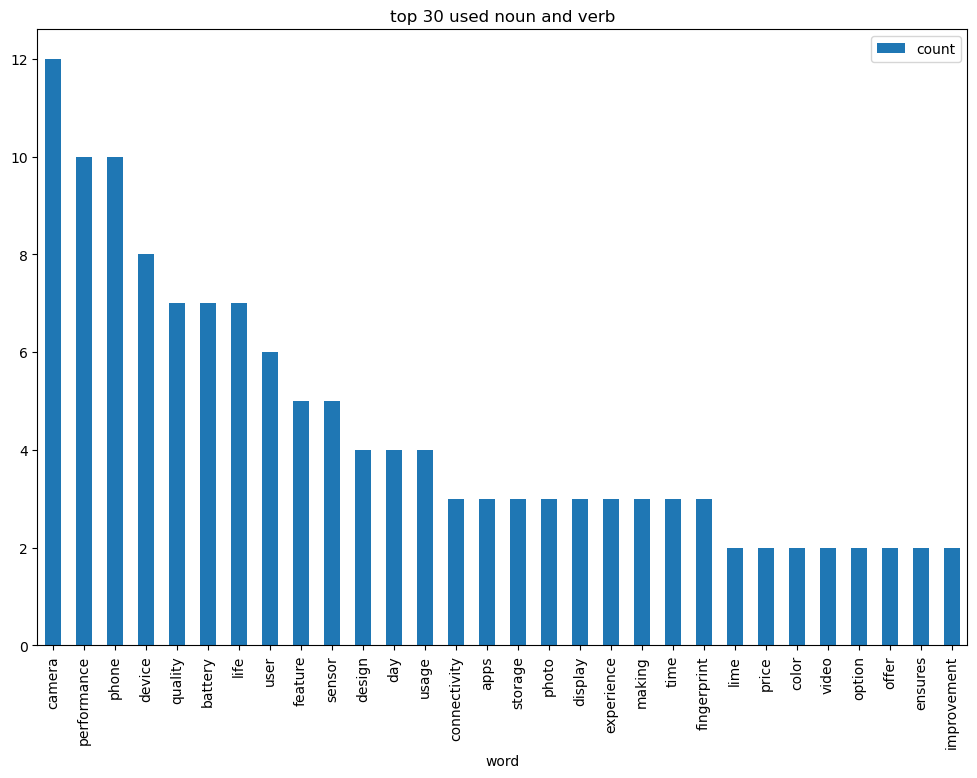

In [79]:
wd_df[0:30].plot.bar(x='word',y='count',figsize=(12,8),title="top 30 used noun and verb")

In [80]:
affin=pd.read_csv("Afinn.csv",sep=',',encoding='latin-1')
affin.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [81]:
affinity_score=affin.set_index('word')['value'].to_dict()
affinity_score

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [82]:
user_review_sentiment=data1[['Review']]
user_review_sentiment.head()

,Review
0,I recently upgraded to the OnePlus Nord CE 3 L...
1,"Hi all,This is a two month usage review of Nor..."
2,The OnePlus Nord CE 3 5G is a device that does...
3,"The phone is good overall, the quality, the so..."
4,"I liked this smartphone, using since purchased..."


In [83]:
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_score

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence :
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
        return sent_score

In [84]:
calculate_sentiment('good')

3

In [85]:
user_review_sentiment['sentiment_value']=user_review_sentiment['Review'].apply(calculate_sentiment)
user_review_sentiment

,Review,sentiment_value
0,I recently upgraded to the OnePlus Nord CE 3 L...,41
1,"Hi all,This is a two month usage review of Nor...",13
2,The OnePlus Nord CE 3 5G is a device that does...,27
3,"The phone is good overall, the quality, the so...",0
4,"I liked this smartphone, using since purchased...",5
...,...,...
805,This is a good product and photo shoot by came...,5
806,Awesome Fon at this budget.,0
807,Perfect phone for mid budget. Nice for family ...,6
808,Camera fine.Performance up to the markOverall ...,5


In [86]:
user_review_sentiment['word_count']=user_review_sentiment['Review'].str.split().apply(len)
user_review_sentiment.head()

,Review,sentiment_value,word_count
0,I recently upgraded to the OnePlus Nord CE 3 L...,41,333
1,"Hi all,This is a two month usage review of Nor...",13,170
2,The OnePlus Nord CE 3 5G is a device that does...,27,239
3,"The phone is good overall, the quality, the so...",0,16
4,"I liked this smartphone, using since purchased...",5,18


In [87]:
user_review_sentiment.sort_values(by='sentiment_value',ascending=False)

,Review,sentiment_value,word_count
0,I recently upgraded to the OnePlus Nord CE 3 L...,41,333
120,I recently upgraded to the OnePlus Nord CE 3 L...,41,333
170,I recently upgraded to the OnePlus Nord CE 3 L...,41,333
510,I recently upgraded to the OnePlus Nord CE 3 L...,41,333
520,I recently upgraded to the OnePlus Nord CE 3 L...,41,333
...,...,...,...
653,"The phone is good overall, the quality, the so...",0,16
656,Awesome Fon at this budget.,0,5
216,Awesome Fon at this budget.,0,5
86,Awesome Fon at this budget.,0,5


In [88]:
user_review_sentiment.describe().T

,count,mean,std,min,25%,50%,75%,max
sentiment_value,810.0,11.0,12.433457,0.0,5.0,5.5,13.0,41.0
word_count,810.0,85.7,112.328034,5.0,13.0,17.0,170.0,333.0


In [89]:
user_review_sentiment[user_review_sentiment['sentiment_value']>0]

,Review,sentiment_value,word_count
0,I recently upgraded to the OnePlus Nord CE 3 L...,41,333
1,"Hi all,This is a two month usage review of Nor...",13,170
2,The OnePlus Nord CE 3 5G is a device that does...,27,239
4,"I liked this smartphone, using since purchased...",5,18
5,This is a good product and photo shoot by came...,5,13
...,...,...,...
804,"I liked this smartphone, using since purchased...",5,18
805,This is a good product and photo shoot by came...,5,13
807,Perfect phone for mid budget. Nice for family ...,6,9
808,Camera fine.Performance up to the markOverall ...,5,16


In [90]:
user_review_sentiment[user_review_sentiment['sentiment_value']<0]

,Review,sentiment_value,word_count


In [91]:
user_review_sentiment[user_review_sentiment['sentiment_value']==0]

,Review,sentiment_value,word_count
3,"The phone is good overall, the quality, the so...",0,16
6,Awesome Fon at this budget.,0,5
13,"The phone is good overall, the quality, the so...",0,16
16,Awesome Fon at this budget.,0,5
23,"The phone is good overall, the quality, the so...",0,16
...,...,...,...
786,Awesome Fon at this budget.,0,5
793,"The phone is good overall, the quality, the so...",0,16
796,Awesome Fon at this budget.,0,5
803,"The phone is good overall, the quality, the so...",0,16


In [101]:
def comment_analysis(x):
    if x == 0:
        return 'neutral'
    elif x < 0:
        return 'negative'
    else:
        return 'positive'

In [102]:
user_review_sentiment['status']=user_review_sentiment['sentiment_value'].apply(lambda x: 'postive' if x>0 else( 'Negative' if x<0 else 'Nutral'))
user_review_sentiment.head()

,Review,sentiment_value,word_count,status
0,I recently upgraded to the OnePlus Nord CE 3 L...,41,333,postive
1,"Hi all,This is a two month usage review of Nor...",13,170,postive
2,The OnePlus Nord CE 3 5G is a device that does...,27,239,postive
3,"The phone is good overall, the quality, the so...",0,16,Nutral
4,"I liked this smartphone, using since purchased...",5,18,postive


In [103]:
user_review_sentiment['status'].value_counts()

postive    648
Nutral     162
Name: status, dtype: int64

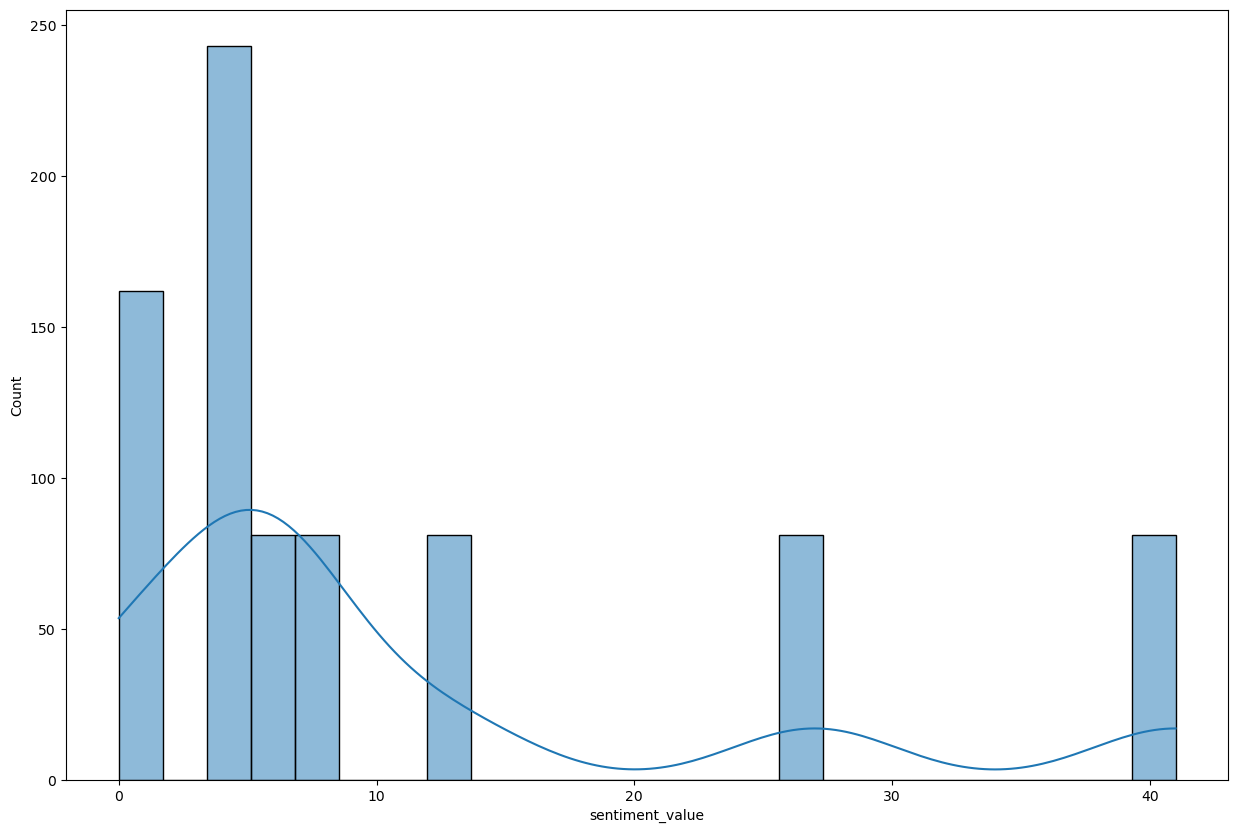

In [104]:
plt.figure(figsize=(15,10))
sns.histplot(user_review_sentiment['sentiment_value'],kde=True)
plt.show()

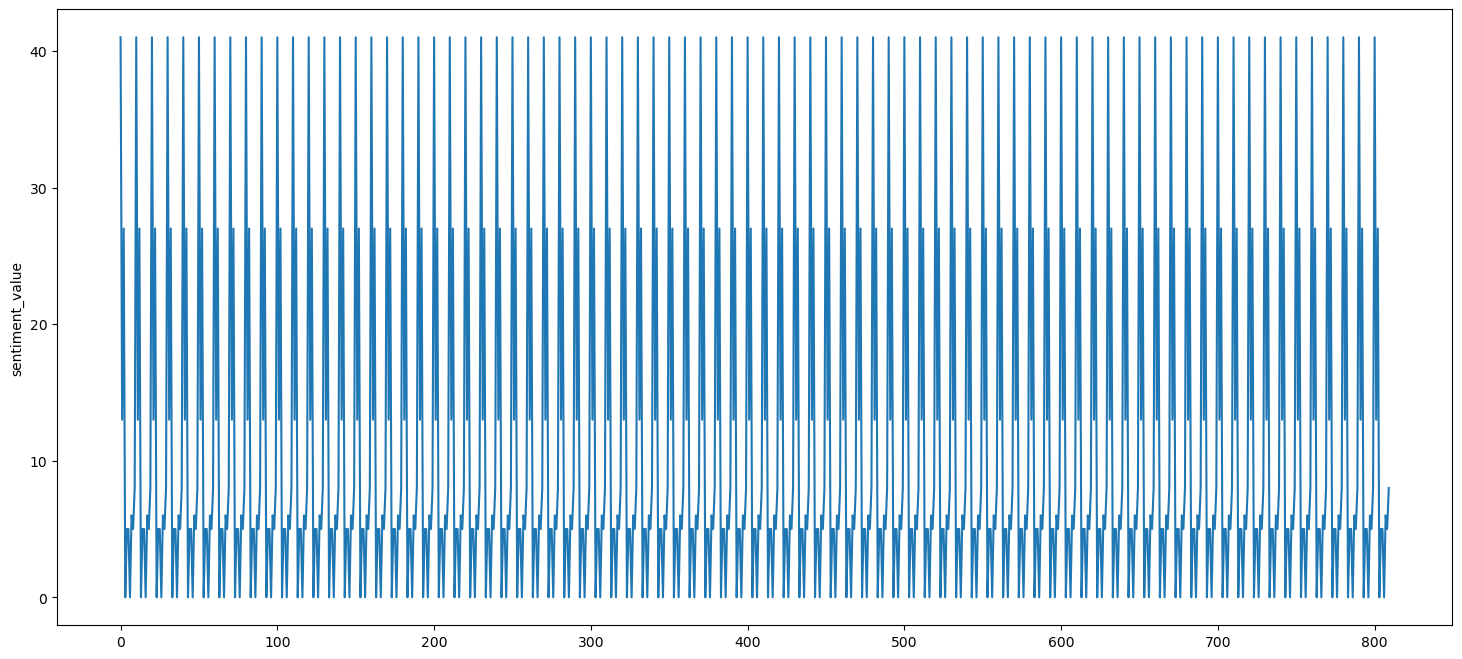

In [105]:
plt.figure(figsize=(18,8))
sns.lineplot(y='sentiment_value',x=range(0,len(user_review_sentiment)),data=user_review_sentiment)
plt.show()

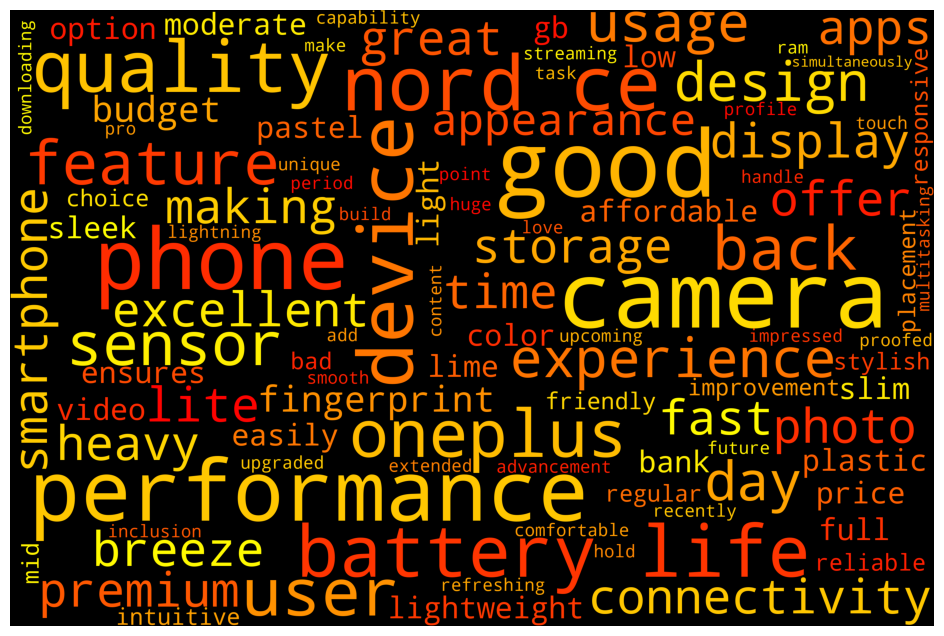

In [106]:
# Wordcloud

def plot_cloud(wordcloud):
    plt.figure(figsize=(20,8))
    plt.imshow(wordcloud)
    plt.axis('off')
    
allwords=' '.join([review for review in lemm_df['lema']])
wordscolud=WordCloud(width=3000,height=2000,background_color='black',max_font_size=300,max_words=100,colormap='autumn').generate(allwords)
plot_cloud(wordscolud)

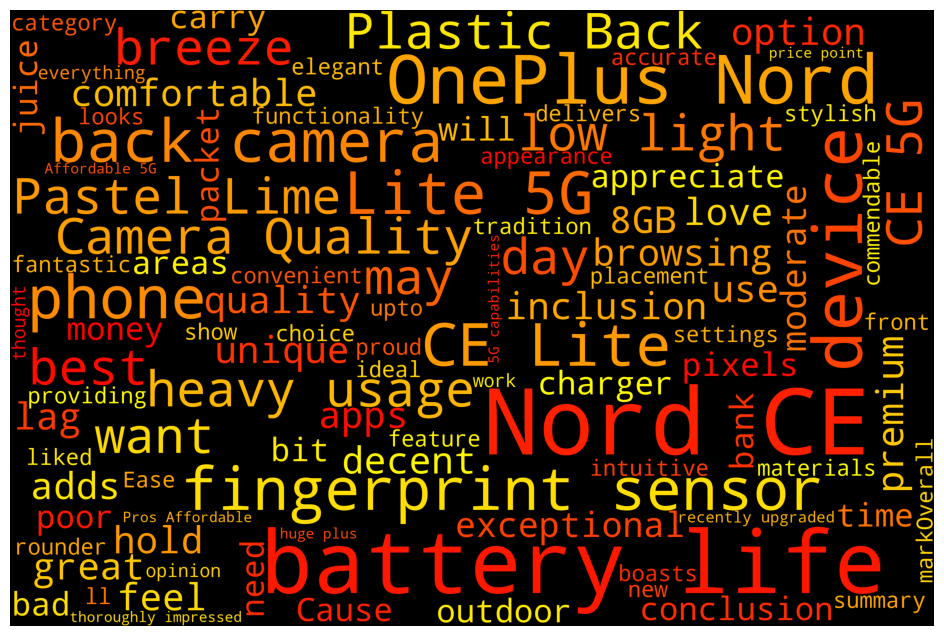

In [107]:
# Positive Words

allwords=' '.join([text for text in user_review_sentiment['Review'][user_review_sentiment.status == 'postive']])
wordscolud=WordCloud(width=3000,height=2000,background_color='black',max_font_size=300,max_words=100,colormap='autumn').generate(allwords)
plot_cloud(wordscolud)